# DAY_082

***
### [作業]
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

### [參考資料]
- [理解 Dropout](https://blog.csdn.net/stdcoutzyx/article/details/49022443)
- [Dropout in Deep Learning](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
# Preproc the inputs
x_train = preproc_x(x_train, flatten=False)
x_test = preproc_x(x_test, flatten=False)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [5]:
def build_mlp(input_shape, drop_rate, hid_layer, num_nurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i in range(hid_layer+1):
        if i==0:
            x = keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation="relu", name="input_layer"+str(i))(input_layer)
        else:
            x = keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu", name="hidden_layer"+str(i))(x)
            x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
            x = keras.layers.Dropout(drop_rate)(x)
        i += 1
    
    x = keras.layers.Flatten()(x)
    
    for i, units in enumerate(num_nurons):
        x = keras.layers.Dense(units=units, activation="relu")(x)
        x = keras.layers.Dropout(drop_rate)(x)
    
    output_layer = keras.layers.Dense(units=10, activation="softmax", name="output_layer")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    adam = keras.optimizers.Adam(lr=1e-3)
    
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [6]:
batch_size = 128
epochs = 30
lr = 1e-3
conv_layer = [2, 4]
drop_rate = [0.2, 0.25, 0.5, 1]

### Impact of layer and dropout rate

In [7]:
results = {}

for layer in conv_layer:
    for drop in drop_rate:
        
        model = build_mlp(x_train.shape[1:], drop, layer)
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, shuffle=True, validation_data=(x_test, y_test))
        
        # Collecting accuracy/loss
        train_loss = history.history['loss']
        test_loss = history.history['val_loss']
        train_acc = history.history['acc']
        test_acc = history.history['val_acc']
        
        tag = "%s-layers -- dr: %s" %(str(layer+3), str(drop))
        results[tag] = {"train_loss": train_loss,
                        "test_loss": test_loss,
                        "train_acc": train_acc,
                        "test_acc": test_acc
                       }
        

W0724 00:16:24.017118  6600 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 00:16:24.039125  6600 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 00:16:24.041133  6600 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 00:16:24.068123  6600 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0724 00:16:24.071123  6600 deprecation_wrapper.py:119] From C:\Users\Ychu\Anaconda

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 131s 3ms/step - loss: 1.6536 - acc: 0.3851 - val_loss: 1.2722 - val_acc: 0.5418
Epoch 2/30
50000/50000 [==============================] - 131s 3ms/step - loss: 1.2416 - acc: 0.5553 - val_loss: 1.0480 - val_acc: 0.6294
Epoch 3/30
50000/50000 [==============================] - 131s 3ms/step - loss: 1.0621 - acc: 0.6243 - val_loss: 0.9465 - val_acc: 0.6684
Epoch 4/30
50000/50000 [==============================] - 130s 3ms/step - loss: 0.9376 - acc: 0.6721 - val_loss: 0.8451 - val_acc: 0.7003
Epoch 5/30
50000/50000 [==============================] - 131s 3ms/step - loss: 0.8528 - acc: 0.7004 - val_loss: 0.8312 - val_acc: 0.7069
Epoch 6/30
50000/50000 [==============================] - 133s 3ms/step - loss: 0.7820 - acc: 0.7262 - val_loss: 0.7902 - val_acc: 0.7233
Epoch 7/30
50000/50000 [==============================] - 131s 3ms/step - loss: 0.7212 - acc: 0.7490 - val_loss: 0.7369 - 

50000/50000 [==============================] - 130s 3ms/step - loss: 0.3431 - acc: 0.8789 - val_loss: 0.7511 - val_acc: 0.7734
Epoch 30/30
50000/50000 [==============================] - 130s 3ms/step - loss: 0.3299 - acc: 0.8850 - val_loss: 0.7497 - val_acc: 0.7756
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 131s 3ms/step - loss: 1.9743 - acc: 0.2450 - val_loss: 1.6759 - val_acc: 0.3787
Epoch 2/30
50000/50000 [==============================] - 131s 3ms/step - loss: 1.6481 - acc: 0.3898 - val_loss: 1.6301 - val_acc: 0.4223
Epoch 3/30
50000/50000 [==============================] - 131s 3ms/step - loss: 1.5176 - acc: 0.4480 - val_loss: 1.5510 - val_acc: 0.4676
Epoch 4/30
50000/50000 [==============================] - 131s 3ms/step - loss: 1.4299 - acc: 0.4852 - val_loss: 1.4115 - val_acc: 0.5164
Epoch 5/30
50000/50000 [==============================] - 131s 3ms/step - loss: 1.3614 - acc: 0.5132 - val_loss: 1.3516 - val_acc: 0

50000/50000 [==============================] - 126s 3ms/step - loss: 0.0417 - acc: 0.9861 - val_loss: 1.7970 - val_acc: 0.7207
Epoch 28/30
50000/50000 [==============================] - 125s 3ms/step - loss: 0.0335 - acc: 0.9890 - val_loss: 2.0139 - val_acc: 0.7170
Epoch 29/30
50000/50000 [==============================] - 125s 3ms/step - loss: 0.0432 - acc: 0.9860 - val_loss: 1.8176 - val_acc: 0.7205
Epoch 30/30
50000/50000 [==============================] - 125s 3ms/step - loss: 0.0367 - acc: 0.9878 - val_loss: 1.8675 - val_acc: 0.7194
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 133s 3ms/step - loss: 1.8910 - acc: 0.2824 - val_loss: 1.6448 - val_acc: 0.3778
Epoch 2/30
50000/50000 [==============================] - 132s 3ms/step - loss: 1.5151 - acc: 0.4376 - val_loss: 1.3062 - val_acc: 0.5291
Epoch 3/30
50000/50000 [==============================] - 132s 3ms/step - loss: 1.3627 - acc: 0.5020 - val_loss: 1.2412 - val_acc:

50000/50000 [==============================] - 133s 3ms/step - loss: 0.8910 - acc: 0.6883 - val_loss: 0.7818 - val_acc: 0.7241
Epoch 26/30
50000/50000 [==============================] - 133s 3ms/step - loss: 0.8884 - acc: 0.6928 - val_loss: 0.7969 - val_acc: 0.7241
Epoch 27/30
50000/50000 [==============================] - 133s 3ms/step - loss: 0.8901 - acc: 0.6875 - val_loss: 0.7831 - val_acc: 0.7284
Epoch 28/30
50000/50000 [==============================] - 133s 3ms/step - loss: 0.8817 - acc: 0.6936 - val_loss: 0.7649 - val_acc: 0.7331
Epoch 29/30
50000/50000 [==============================] - 133s 3ms/step - loss: 0.8785 - acc: 0.6927 - val_loss: 0.7817 - val_acc: 0.7242
Epoch 30/30
50000/50000 [==============================] - 133s 3ms/step - loss: 0.8694 - acc: 0.6966 - val_loss: 0.7832 - val_acc: 0.7235
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 135s 3ms/step - loss: 2.1319 - acc: 0.1595 - val_loss: 2.0201 - val_ac

50000/50000 [==============================] - 128s 3ms/step - loss: 0.2548 - acc: 0.9068 - val_loss: 1.0665 - val_acc: 0.7334
Epoch 24/30
50000/50000 [==============================] - 127s 3ms/step - loss: 0.2318 - acc: 0.9168 - val_loss: 1.1486 - val_acc: 0.7351
Epoch 25/30
50000/50000 [==============================] - 127s 3ms/step - loss: 0.2244 - acc: 0.9188 - val_loss: 1.1746 - val_acc: 0.7380
Epoch 26/30
50000/50000 [==============================] - 127s 3ms/step - loss: 0.1998 - acc: 0.9271 - val_loss: 1.2074 - val_acc: 0.7280
Epoch 27/30
50000/50000 [==============================] - 130s 3ms/step - loss: 0.1898 - acc: 0.9315 - val_loss: 1.2436 - val_acc: 0.7294
Epoch 28/30
50000/50000 [==============================] - 129s 3ms/step - loss: 0.1741 - acc: 0.9381 - val_loss: 1.3034 - val_acc: 0.7225
Epoch 29/30
50000/50000 [==============================] - 128s 3ms/step - loss: 0.1716 - acc: 0.9384 - val_loss: 1.2852 - val_acc: 0.7260
Epoch 30/30
50000/50000 [==============

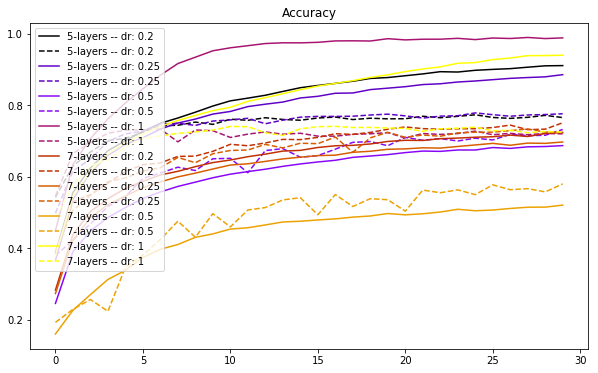

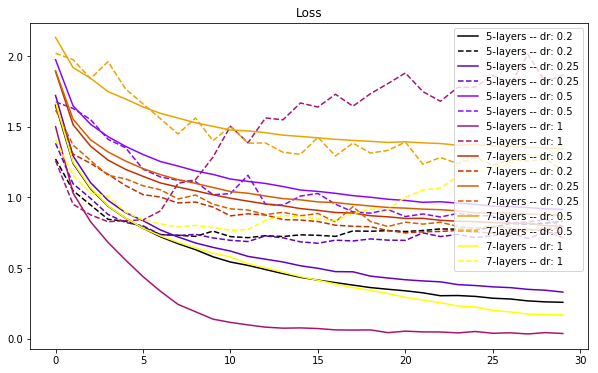

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, len(results))]

plt.figure(figsize=(10, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(results[cond]['train_acc'], '-', label=cond, color=colors[i])
    plt.plot(results[cond]['test_acc'], '--', label=cond, color=colors[i])
plt.title("Accuracy")
plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(10, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=colors[i])
    plt.plot(range(len(results[cond]['test_loss'])),results[cond]['test_loss'], '--', label=cond, color=colors[i])
plt.title("Loss")
plt.legend(loc="upper right")
plt.show()

In [9]:
loss, acc = model.evaluate(x_test, y_test)
print(f'Accuracy: {acc}')
print(f'Loss: {loss}')

10000/10000 [==============================] - 7s 698us/step
Accuracy: 0.7241
Loss: 1.3563010947227478
